In [ ]:
pip install --upgrade pandas==2.2.3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 18.1 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.2
    Uninstalling pandas-2.2.2:
      Successfully uninstalled pandas-2.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.10.1 requires pandas<2.2.3dev0,>=2.0, but you have pandas 2.2.3 which is incompatible.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.2.3 which is incompatible.


In [ ]:
!pip install pmdarima


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 51.4 MB/s eta 0:00:00


In [ ]:
!pip install statsmodels

In [ ]:
import pandas as pd
import os
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error,accuracy_score,r2_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
import xgboost as xgb

In [ ]:
result=[]

# Random Forest Regressor

[*********************100%***********************]  1 of 1 completed


Price                      Adj Close      Close       High        Low  \
Ticker                           BAC        BAC        BAC        BAC   
Date                                                                    
2004-12-06 00:00:00+00:00  29.881363  46.500000  46.549999  46.049999   
2004-12-07 00:00:00+00:00  29.463659  45.849998  46.610001  45.790001   
2004-12-08 00:00:00+00:00  29.630760  46.110001  46.230000  45.750000   
2004-12-09 00:00:00+00:00  29.688585  46.200001  46.250000  45.820000   
2004-12-10 00:00:00+00:00  29.482946  45.880001  46.169998  45.750000   
...                              ...        ...        ...        ...   
2024-11-13 00:00:00+00:00  45.869999  45.869999  46.480000  45.830002   
2024-11-14 00:00:00+00:00  45.900002  45.900002  46.160000  45.730000   
2024-11-15 00:00:00+00:00  46.750000  46.750000  46.840000  45.619999   
2024-11-18 00:00:00+00:00  46.720001  46.720001  47.020000  46.490002   
2024-11-19 00:00:00+00:00  46.410000  46.410000  46

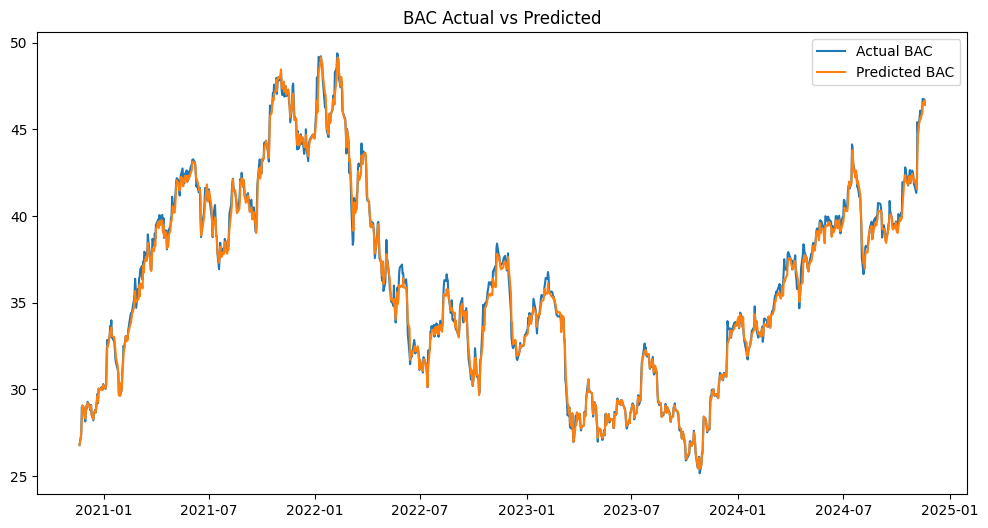

In [ ]:
import yfinance as yf
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Function to create a feature dataset from stock closing prices
def create_features(data):
    data['Prev Close'] = data['Close'].shift(1)
    data['1-day change'] = data['Close'].diff()
    data['5-day average'] = data['Close'].rolling(window=5).mean()
    data['10-day average'] = data['Close'].rolling(window=10).mean()
    data['5-day volatility'] = data['Close'].rolling(window=5).std()
    data.dropna(inplace=True)
    print(data)
    return data

# Define the start and end dates
start_date = "2004-11-20"
end_date = "2024-11-20"

# Fetch historical data
bac_data = yf.download('BAC', start=start_date, end=end_date)

# Create features
bac_features = create_features(bac_data)

# Prepare the dataset for training
def prepare_data(data):
    X = data[['Prev Close', '1-day change', '5-day average', '10-day average', '5-day volatility']]
    y = data['Close']
    return train_test_split(X, y, test_size=0.2, shuffle=False)

X_train_bac, X_test_bac, y_train_bac, y_test_bac = prepare_data(bac_features)

# Initialize and train the Random Forest model
rf_model_bac = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model_bac.fit(X_train_bac, y_train_bac)

# Predictions
predictions_bac = rf_model_bac.predict(X_test_bac)

# Evaluate the model
mse_bac = mean_squared_error(y_test_bac, predictions_bac)
print(f'Mean Squared Error for BAC: {mse_bac}')
r2_bac=r2_score(y_test_bac,predictions_bac)
print(f'R2 score for BAC: {r2_bac}')
result.append({'Model':'Random Forest Clasiifier', 'MSE':mse_bac,"R2 Score":r2_bac})
# Plotting the results
plt.figure(figsize=(12,6))
plt.plot(y_test_bac.index, y_test_bac, label='Actual BAC')
plt.plot(y_test_bac.index, predictions_bac, label='Predicted BAC')
plt.legend()
plt.title('BAC Actual vs Predicted')
plt.show()

# Support Vector Regressor

Mean Squared Error for SVR: 0.06302110997476851
R2 score for BAC: 0.9980592868708448


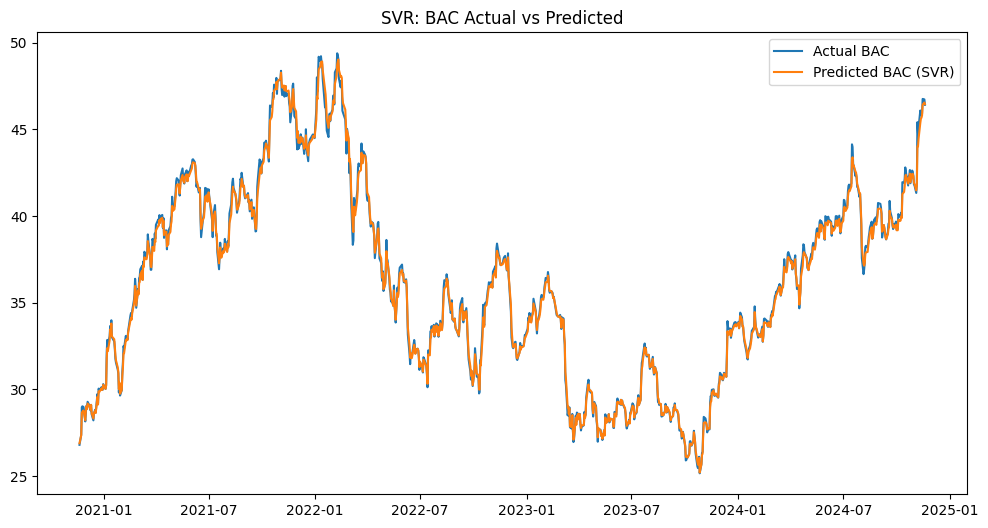

In [ ]:
from sklearn.svm import SVR

# Initialize and train the SVR model
svr_model_bac = SVR(kernel='rbf')
svr_model_bac.fit(X_train_bac, y_train_bac)

# Predictions
predictions_svr_bac = svr_model_bac.predict(X_test_bac)

# Evaluate the model
mse_svr_bac = mean_squared_error(y_test_bac, predictions_svr_bac)
print(f'Mean Squared Error for SVR: {mse_svr_bac}')
r2_svr=r2_score(y_test_bac,predictions_svr_bac)
print(f'R2 score for BAC: {r2_svr}')
result.append({'Model':'SVR', 'MSE':mse_svr_bac,"R2 Score":r2_svr})

# Plotting the results
plt.figure(figsize=(12,6))
plt.plot(y_test_bac.index, y_test_bac, label='Actual BAC')
plt.plot(y_test_bac.index, predictions_svr_bac, label='Predicted BAC (SVR)')
plt.legend()
plt.title('SVR: BAC Actual vs Predicted')
plt.show()

# Decision Tree Regressor

Mean Squared Error for Decision Tree: 0.31694330163642476
R2 score for BAC: 0.9959045664216714


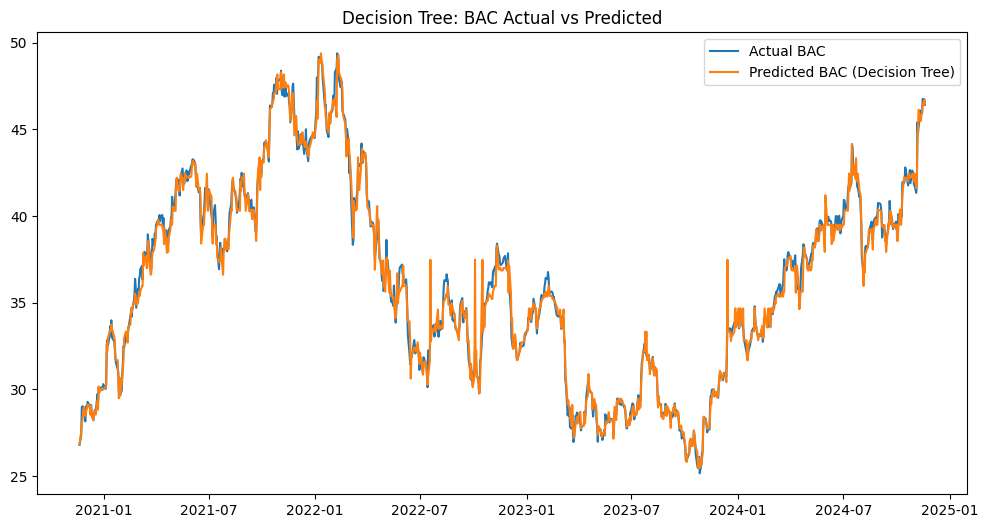

In [ ]:
from sklearn.tree import DecisionTreeRegressor

# Initialize and train the Decision Tree model
dt_model_bac = DecisionTreeRegressor(random_state=42)
dt_model_bac.fit(X_train_bac, y_train_bac)

# Predictions
predictions_dt_bac = dt_model_bac.predict(X_test_bac)

# Evaluate the model
mse_dt_bac = mean_squared_error(y_test_bac, predictions_dt_bac)
print(f'Mean Squared Error for Decision Tree: {mse_dt_bac}')
r2_dt=r2_score(y_test_bac,predictions_bac)
print(f'R2 score for BAC: {r2_dt}')
result.append({'Model':'Decision tree', 'MSE':mse_dt_bac,"R2 Score":r2_dt})

# Plotting the results
plt.figure(figsize=(12,6))
plt.plot(y_test_bac.index, y_test_bac, label='Actual BAC')
plt.plot(y_test_bac.index, predictions_dt_bac, label='Predicted BAC (Decision Tree)')
plt.legend()
plt.title('Decision Tree: BAC Actual vs Predicted')
plt.show()

# XGBOOST Regressor

Mean Squared Error for XGBoost: 0.13164844742356552
R2 score for BAC: 0.9959045664216714


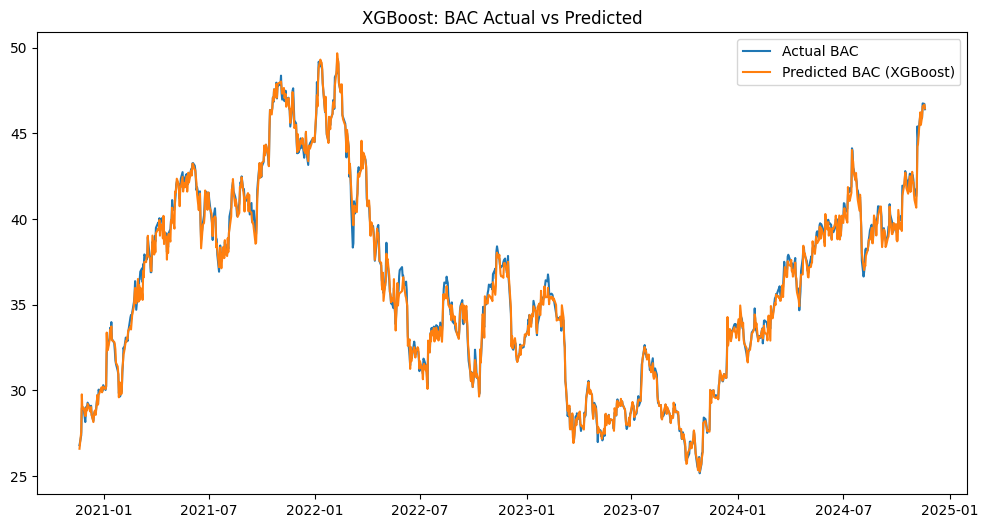

In [ ]:
from xgboost import XGBRegressor

# Initialize and train the XGBoost model
xgb_model_bac = XGBRegressor(n_estimators=100, random_state=42)
xgb_model_bac.fit(X_train_bac, y_train_bac)

# Predictions
predictions_xgb_bac = xgb_model_bac.predict(X_test_bac)

# Evaluate the model
mse_xgb_bac = mean_squared_error(y_test_bac, predictions_xgb_bac)
print(f'Mean Squared Error for XGBoost: {mse_xgb_bac}')
r2_xg=r2_score(y_test_bac,predictions_bac)
print(f'R2 score for BAC: {r2_xg}')
result.append({'Model':'XG BOOSTING', 'MSE':mse_xgb_bac,"R2 Score":r2_xg})

# Plotting the results
plt.figure(figsize=(12,6))
plt.plot(y_test_bac.index, y_test_bac, label='Actual BAC')
plt.plot(y_test_bac.index, predictions_xgb_bac, label='Predicted BAC (XGBoost)')
plt.legend()
plt.title('XGBoost: BAC Actual vs Predicted')
plt.show()


<h1>ARIMA AND SARIMA MODELS

[*********************100%***********************]  1 of 1 completed


Fitting ARIMA model to BAC stock data...
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=9137.508, Time=21.30 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=9132.904, Time=1.51 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=9133.715, Time=1.24 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=9133.730, Time=3.52 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=9130.904, Time=1.04 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=9135.663, Time=4.19 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 32.900 seconds
Best ARIMA Model for BAC:
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 5033
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -4564.452
Date:                Thu, 21 Nov 2024   AIC                           9130.904
Time:                        23:17:26   BIC                           9137.428
Sample:             

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Fitted ARIMA Model for BAC:
                               SARIMAX Results                                
Dep. Variable:                    BAC   No. Observations:                 5033
Model:                 ARIMA(0, 1, 0)   Log Likelihood               -4564.452
Date:                Thu, 21 Nov 2024   AIC                           9130.904
Time:                        23:17:27   BIC                           9137.428
Sample:                             0   HQIC                          9133.190
                               - 5033                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.3593      0.002    183.144      0.000       0.355       0.363
Ljung-Box (L1) (Q):                   1.19   Jarque-Bera (JB):            127682.37
Prob(Q):           

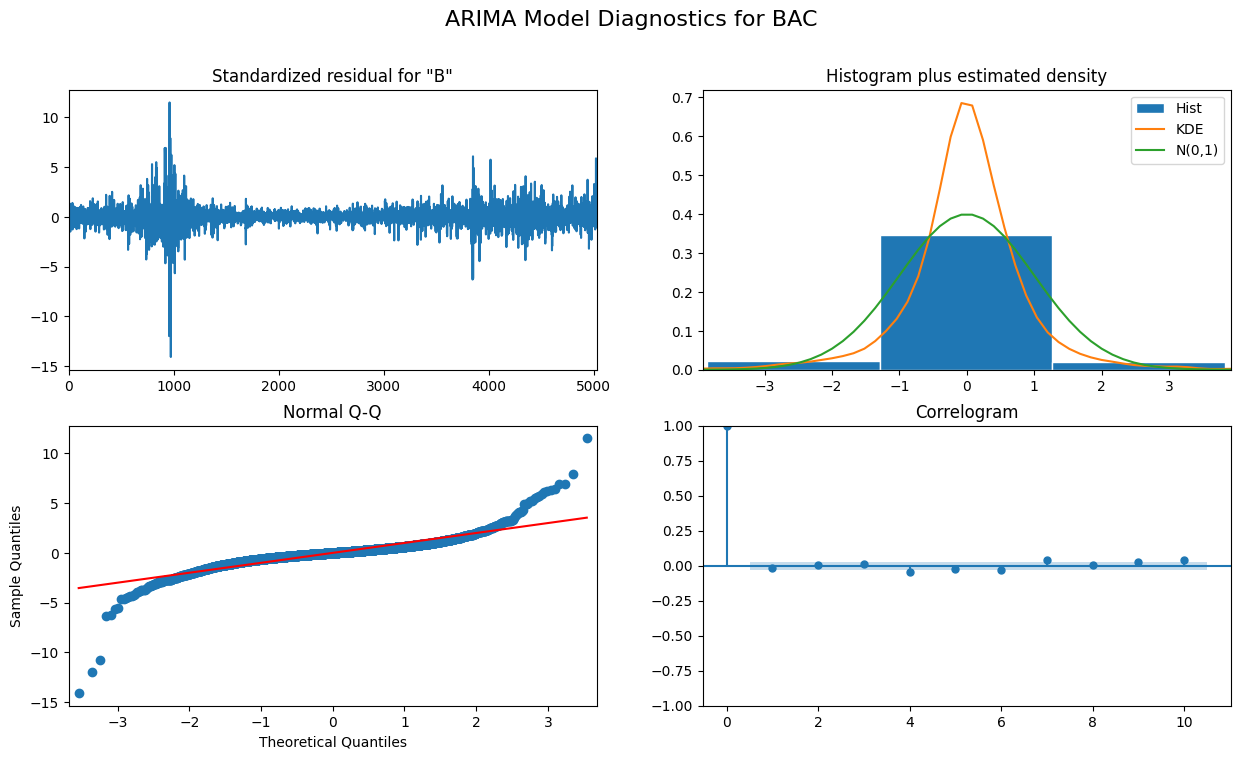

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


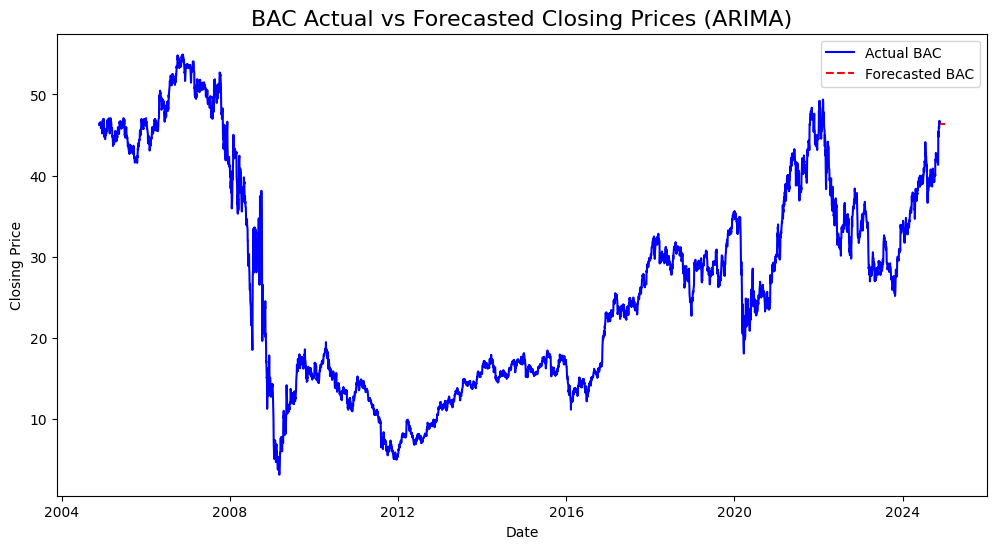


Fitting SARIMA model to BAC stock data...
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=9138.314, Time=26.78 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=9132.904, Time=0.37 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=9131.748, Time=2.14 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=9131.803, Time=5.09 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=9130.904, Time=0.14 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=9131.350, Time=1.29 sec
 ARIMA(0,1,0)(0,0,1)[12] intercept   : AIC=9131.378, Time=1.65 sec
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=9133.342, Time=4.54 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=9133.715, Time=0.33 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=9133.730, Time=0.90 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=9135.663, Time=1.48 sec

Best model:  ARIMA(0,1,0)(0,0,0)[12]          
Total fit time: 44.879 seconds
Best SARIMA Model for BAC:
                               SARIMAX Results                        

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Fitted SARIMA Model for BAC:
                               SARIMAX Results                                
Dep. Variable:                    BAC   No. Observations:                 5033
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -4564.452
Date:                Thu, 21 Nov 2024   AIC                           9130.904
Time:                        23:18:17   BIC                           9137.428
Sample:                             0   HQIC                          9133.190
                               - 5033                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.3593      0.002    183.144      0.000       0.355       0.363
Ljung-Box (L1) (Q):                   1.19   Jarque-Bera (JB):            127682.37
Prob(Q):          

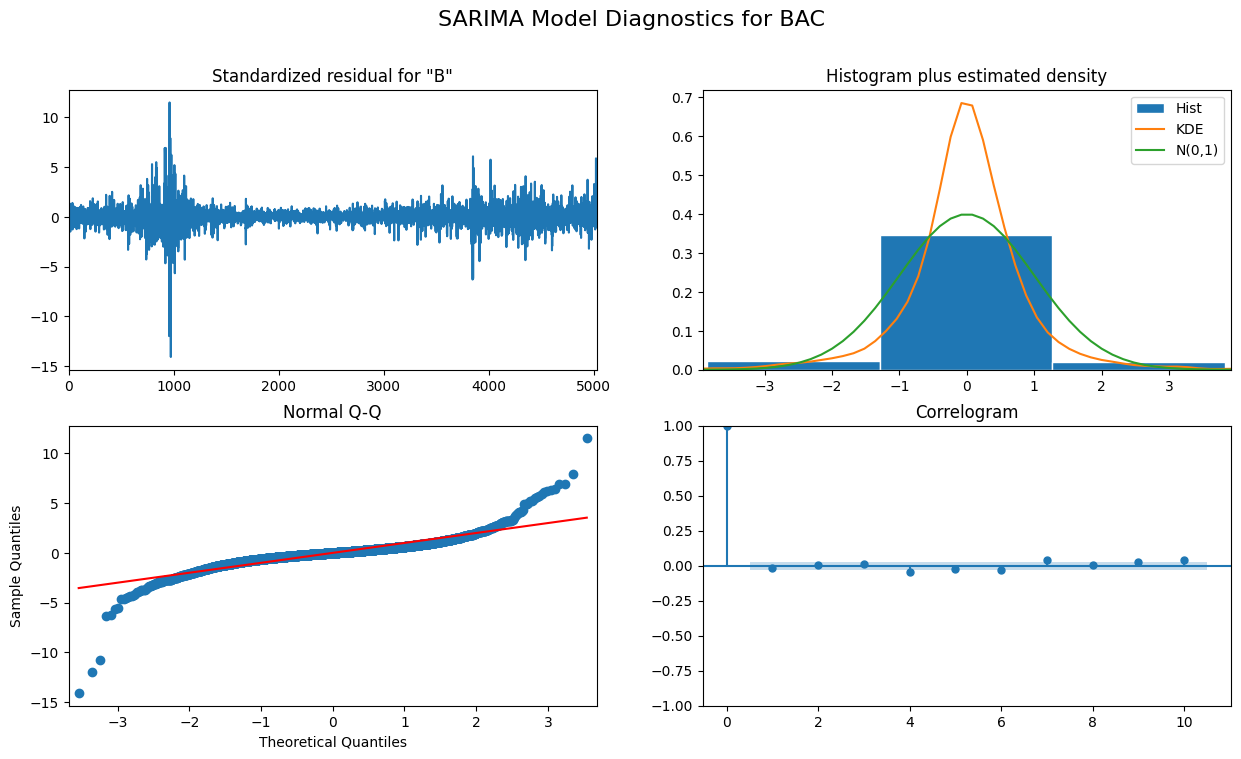

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


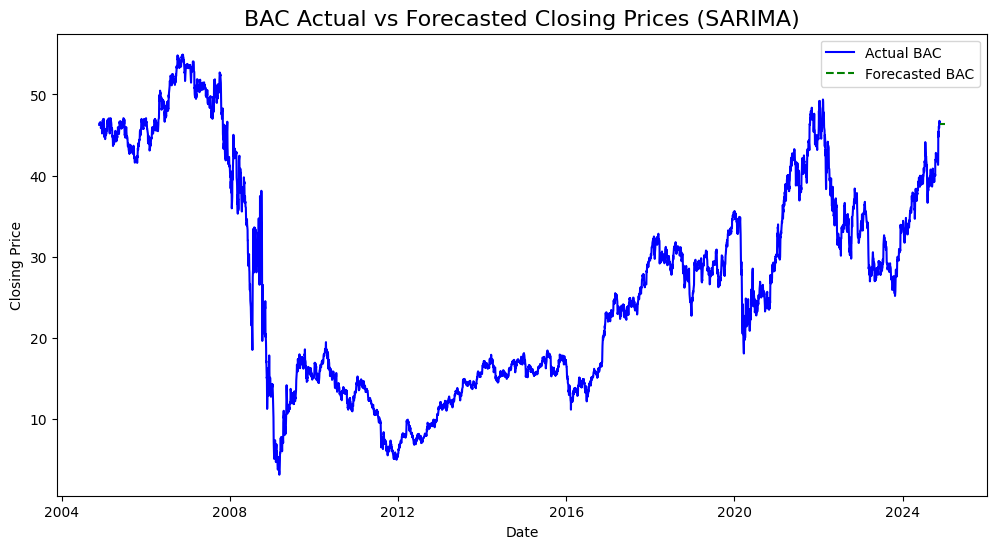

In [ ]:
import yfinance as yf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima import auto_arima
import matplotlib.pyplot as plt
import pandas as pd

# Fetch BAC stock data from Yahoo Finance
bac_data = yf.download('BAC', start='2004-11-20', end='2024-11-20')['Close']

# Function to fit ARIMA model and forecast
def fit_arima(stock_data, ticker):
    # Handle missing values by forward filling
    stock_data = stock_data.fillna(method='ffill')

    # Automatically determine the best ARIMA (p, d, q) values
    auto_model = auto_arima(stock_data, seasonal=False, stepwise=True, suppress_warnings=True, error_action="ignore", max_order=None, trace=True)

    print(f"Best ARIMA Model for {ticker}:")
    print(auto_model.summary())

    # Fit the ARIMA model using the best (p, d, q) values
    model = ARIMA(stock_data, order=auto_model.order)
    model_fit = model.fit()

    print(f"Fitted ARIMA Model for {ticker}:")
    print(model_fit.summary())

    # Plot diagnostics
    model_fit.plot_diagnostics(figsize=(15, 8))
    plt.suptitle(f'ARIMA Model Diagnostics for {ticker}', fontsize=16)
    plt.show()

    # Forecast future values (e.g., next 30 days)
    forecast_steps = 30
    forecast = model_fit.forecast(steps=forecast_steps)
    forecast_index = pd.date_range(start=stock_data.index[-1], periods=forecast_steps+1, freq='B')[1:]  # Forecasted dates
    msea = mean_squared_error(stock_data[0:30], forecast)
    result.append({'Model':'Arima', 'MSE':msea,"R2 Score":r2_xg})

    # Plot actual vs forecasted prices
    plt.figure(figsize=(12, 6))
    plt.plot(stock_data.index, stock_data, label=f'Actual {ticker}', color='blue')
    plt.plot(forecast_index, forecast, label=f'Forecasted {ticker}', linestyle='--', color='red')
    plt.title(f'{ticker} Actual vs Forecasted Closing Prices (ARIMA)', fontsize=16)
    plt.xlabel('Date')
    plt.ylabel('Closing Price')
    plt.legend()
    plt.show()

    return model_fit

# Function to fit SARIMA model and forecast
def fit_sarima(stock_data, ticker):
    # Handle missing values by forward filling
    stock_data = stock_data.fillna(method='ffill')

    # Automatically determine the best SARIMA (p, d, q)(P, D, Q, S) values
    auto_model = auto_arima(stock_data, seasonal=True, m=12, stepwise=True, suppress_warnings=True, error_action="ignore", trace=True)

    print(f"Best SARIMA Model for {ticker}:")
    print(auto_model.summary())

    # Fit the SARIMA model using the best (p, d, q)(P, D, Q, S) values
    model = SARIMAX(stock_data, order=auto_model.order, seasonal_order=auto_model.seasonal_order)
    model_fit = model.fit()

    print(f"Fitted SARIMA Model for {ticker}:")
    print(model_fit.summary())

    # Plot diagnostics
    model_fit.plot_diagnostics(figsize=(15, 8))
    plt.suptitle(f'SARIMA Model Diagnostics for {ticker}', fontsize=16)
    plt.show()

    # Forecast future values (e.g., next 30 days)
    forecast_steps = 30
    forecast = model_fit.forecast(steps=forecast_steps)
    forecast_index = pd.date_range(start=stock_data.index[-1], periods=forecast_steps+1, freq='B')[1:]  # Forecasted dates
    mses = mean_squared_error(stock_data[0:30], forecast)
    result.append({'Model':'sarima', 'MSE':mses,"R2 Score":r2_xg})
    # Plot actual vs forecasted prices
    plt.figure(figsize=(12, 6))
    plt.plot(stock_data.index, stock_data, label=f'Actual {ticker}', color='blue')
    plt.plot(forecast_index, forecast, label=f'Forecasted {ticker}', linestyle='--', color='green')
    plt.title(f'{ticker} Actual vs Forecasted Closing Prices (SARIMA)', fontsize=16)
    plt.xlabel('Date')
    plt.ylabel('Closing Price')
    plt.legend()
    plt.show()

    return model_fit

# Apply ARIMA model to BAC stock data
print("Fitting ARIMA model to BAC stock data...")
arima_model_fit = fit_arima(bac_data, 'BAC')

# Apply SARIMA model to BAC stock data
print("\nFitting SARIMA model to BAC stock data...")
sarima_model_fit = fit_sarima(bac_data, 'BAC')


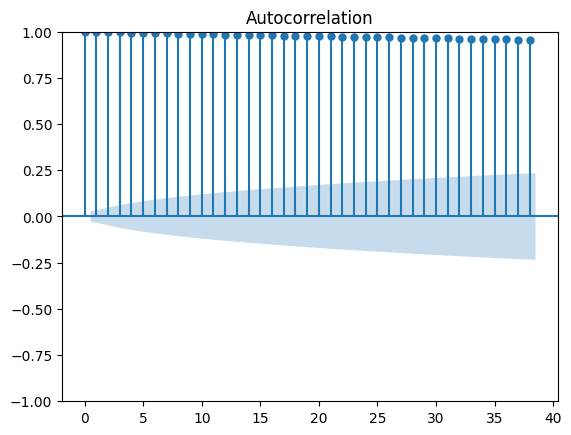

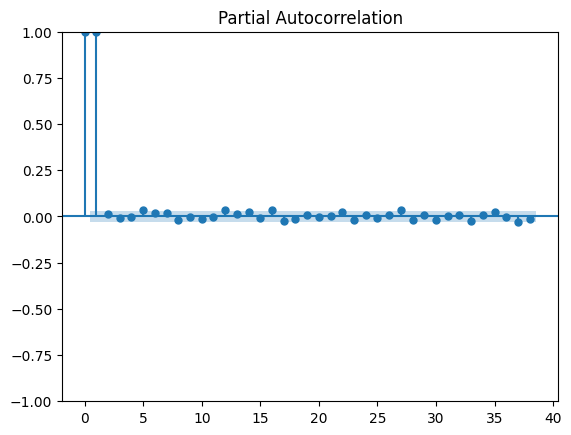

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(bac_features['Close'])
plot_pacf(bac_features['Close'])
plt.show()

In [ ]:
results_df = pd.DataFrame(result)

results_df

,Model,MSE,R2 Score
0,Random Forest Clasiifier,0.132992,0.995905
1,SVR,0.063021,0.998059
2,Decision tree,0.316943,0.995905
3,XG BOOSTING,0.131648,0.995905
4,Arima,0.192423,0.995905
5,sarima,0.192423,0.995905


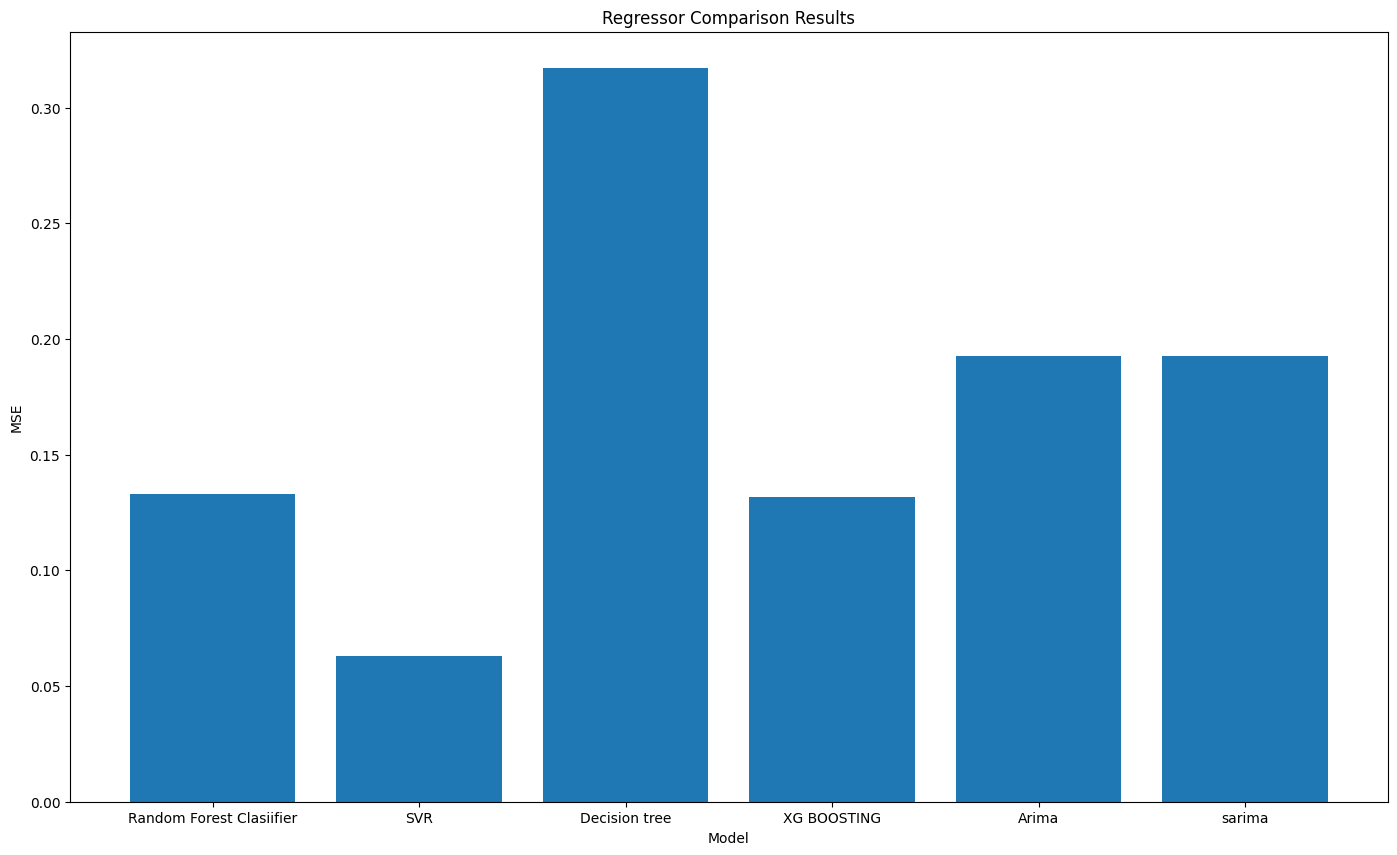

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(17, 10))

plt.bar(results_df['Model'],results_df['MSE'])
plt.xlabel('Model')
plt.ylabel('MSE')
plt.title('Regressor Comparison Results')
plt.show()

In [ ]:
import pickle

In [ ]:
with open('proj.pkl','wb') as file:
    pickle.dump(svr_model_bac,file)

In [ ]:
from google.colab import files

# Download the file to your local computer
files.download('proj.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
_